In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

In [84]:
# Read the data
df = pd.read_csv('/Users/jamesliao2018/Downloads/device_failure.csv',encoding="ISO-8859-1")

In [85]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [86]:
df[df.failure==1].head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0


###### Assuming that the date of each device appeared first is the starting date, we add the running days on each day as the new feature "length"

In [87]:
df['date']=pd.to_datetime(df['date'])

In [88]:
df[df.device=='S1F01085']

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,0,7
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,0,7
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,0,7
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,0,7
5812,2015-01-06,S1F01085,0,128832128,56,0,52,6,409404,0,0,7


In [89]:
df_device_start = df.groupby('device').date.min().reset_index()

In [90]:
df_device_start.head()

,device,date
0,S1F01085,2015-01-01
1,S1F013BB,2015-05-06
2,S1F0166B,2015-01-01
3,S1F01E6Y,2015-01-01
4,S1F01JE0,2015-01-01


In [91]:
df_device_start = df_device_start.merge(df,on=['device','date'],how='left')

In [92]:
df_device_start.columns

Index(['device', 'date', 'failure', 'attribute1', 'attribute2', 'attribute3',
       'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
       'attribute9'],
      dtype='object')

In [93]:
list_feat = df_device_start.columns[1:]

In [94]:
dict_feat = {}

In [95]:
for i in list_feat:
    if i not in dict_feat:
        dict_feat[i] = i+'_start'

In [96]:
df_device_start = df_device_start.rename(columns=dict_feat)

In [97]:
df_device_start.head()

,device,date_start,failure_start,attribute1_start,attribute2_start,attribute3_start,attribute4_start,attribute5_start,attribute6_start,attribute7_start,attribute8_start,attribute9_start
0,S1F01085,2015-01-01,0,215630672,56,0,52,6,407438,0,0,7
1,S1F013BB,2015-05-06,0,14533968,0,0,0,5,688952,0,0,0
2,S1F0166B,2015-01-01,0,61370680,0,3,0,6,403174,0,0,0
3,S1F01E6Y,2015-01-01,0,173295968,0,0,0,12,237394,0,0,0
4,S1F01JE0,2015-01-01,0,79694024,0,0,0,6,410186,0,0,0


In [98]:
df_device_start.failure_start.value_counts()

0    1169
Name: failure_start, dtype: int64

In [99]:
df = df_device_start.merge(df,on=['device'],how='left')

In [100]:
df.head()

,device,date_start,failure_start,attribute1_start,attribute2_start,attribute3_start,attribute4_start,attribute5_start,attribute6_start,attribute7_start,...,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,S1F01085,2015-01-01,0,215630672,56,0,52,6,407438,0,...,0,215630672,56,0,52,6,407438,0,0,7
1,S1F01085,2015-01-01,0,215630672,56,0,52,6,407438,0,...,0,1650864,56,0,52,6,407438,0,0,7
2,S1F01085,2015-01-01,0,215630672,56,0,52,6,407438,0,...,0,124017368,56,0,52,6,407438,0,0,7
3,S1F01085,2015-01-01,0,215630672,56,0,52,6,407438,0,...,0,128073224,56,0,52,6,407439,0,0,7
4,S1F01085,2015-01-01,0,215630672,56,0,52,6,407438,0,...,0,97393448,56,0,52,6,408114,0,0,7


In [101]:
df[df.device=='S1F0CTDN'].to_csv('sample_device_0624.csv')

In [102]:
df['device_head']=df['device'].apply(lambda x:x[:2])

In [103]:
df.device_head.value_counts()

S1    54858
W1    43268
Z1    26368
Name: device_head, dtype: int64

In [104]:
df['device_mid']=df['device'].apply(lambda x:x[2:4])

In [105]:
df.device_mid.value_counts()

F0    75332
F1    48911
F2      251
Name: device_mid, dtype: int64

In [106]:
df['device_last']=df['device'].apply(lambda x:x[4:])

In [111]:
df.device_last.value_counts()

JY02    304
KJDS    304
5X69    304
JXDL    304
MA1S    304
FGBQ    304
QK05    304
QLC1    304
GB8A    304
G9T7    304
QL3N    304
FZPA    304
KKN4    304
GPXY    304
Q8RT    304
H6JG    304
FEH7    304
GE1M    304
SJJ2    304
GGPP    304
E9EP    304
FY92    304
KYCR    304
JH87    304
GCED    304
FP0C    304
EGMT    304
T0B1    299
3432    295
1SL0    295
       ... 
BN0S      5
CT09      5
8R94      5
CSRZ      5
NTWG      5
3RV3      5
5P5Z      5
L55E      5
CJKT      5
4F5V      5
19X9      5
CWXJ      5
CHZK      5
BJ6E      5
CTRL      5
LR8G      5
LL2X      5
KDDQ      5
CTDY      5
1FCC      5
4GWF      5
H9RN      5
0QH3      5
51C1      5
L7NS      5
A0CJ      5
LQDQ      5
4KSC      4
WJFT      3
DA5ÿ      1
Name: device_last, Length: 1169, dtype: int64

In [112]:
df[df.device_last=='KJDS'].device.unique()

array(['Z1F0KJDS'], dtype=object)

In [113]:
df[df.device_mid=='F1'].device.unique()

array(['S1F100R5', 'S1F101MC', 'S1F101SP', 'S1F1021H', 'S1F102L8',
       'S1F1073Z', 'S1F10AS0', 'S1F10BNL', 'S1F10BRH', 'S1F10D0P',
       'S1F10E6M', 'S1F10EBC', 'S1F10FDX', 'S1F10FF0', 'S1F10FFZ',
       'S1F10FZB', 'S1F10GDQ', 'S1F10GSG', 'S1F10HH5', 'S1F10JL3',
       'S1F10NDB', 'S1F10NM6', 'S1F10P0S', 'S1F10PED', 'S1F10QDG',
       'S1F10QG6', 'S1F10QH3', 'S1F10QL8', 'S1F10RKC', 'S1F10RWZ',
       'S1F10V1N', 'S1F10VJH', 'S1F10VP8', 'S1F114QM', 'S1F114QR',
       'S1F115Z6', 'S1F1162D', 'S1F116H4', 'S1F116J4', 'S1F117PK',
       'S1F118JP', 'S1F119X9', 'S1F11A9R', 'S1F11AK8', 'S1F11AXR',
       'S1F11B1E', 'S1F11C16', 'S1F11CJC', 'S1F11DBJ', 'S1F11ETS',
       'S1F11G2C', 'S1F11GG5', 'S1F11K34', 'S1F11KAY', 'S1F11KQW',
       'S1F11L11', 'S1F11MB0', 'S1F11MT9', 'S1F11S2Q', 'S1F11S5B',
       'S1F11WEH', 'S1F11XDA', 'S1F11Y4K', 'S1F11YHR', 'S1F121LH',
       'S1F122HQ', 'S1F122KD', 'S1F12788', 'S1F12XGM', 'S1F12XJ4',
       'S1F12Y53', 'S1F12ZAS', 'S1F12ZQB', 'S1F12ZQN', 'S1F12Z

In [42]:
df['length'] = df['date']-df['date_start']

In [49]:
df['length'] = df['length'].dt.days

In [50]:
df.head()

,device,date_start,date,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,length
0,S1F01085,2015-01-01,2015-01-01,0,215630672,56,0,52,6,407438,0,0,7,0
1,S1F01085,2015-01-01,2015-01-02,0,1650864,56,0,52,6,407438,0,0,7,1
2,S1F01085,2015-01-01,2015-01-03,0,124017368,56,0,52,6,407438,0,0,7,2
3,S1F01085,2015-01-01,2015-01-04,0,128073224,56,0,52,6,407439,0,0,7,3
4,S1F01085,2015-01-01,2015-01-05,0,97393448,56,0,52,6,408114,0,0,7,4


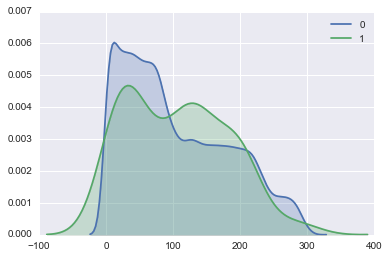

In [57]:
for col in [0,1]:
    sns.kdeplot(df[df.failure==col]['length'], shade=True,label = col)

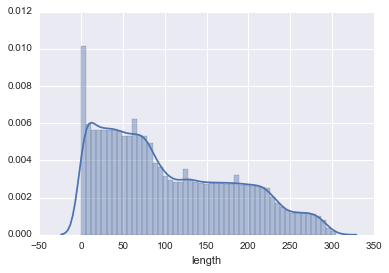

In [61]:
sns.distplot(df[df.failure==0]['length'])


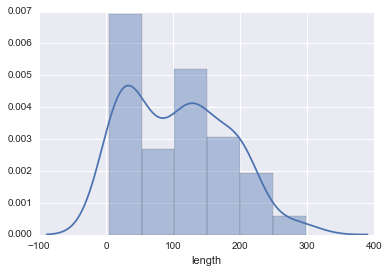

In [62]:
sns.distplot(df[df.failure==1]['length']);